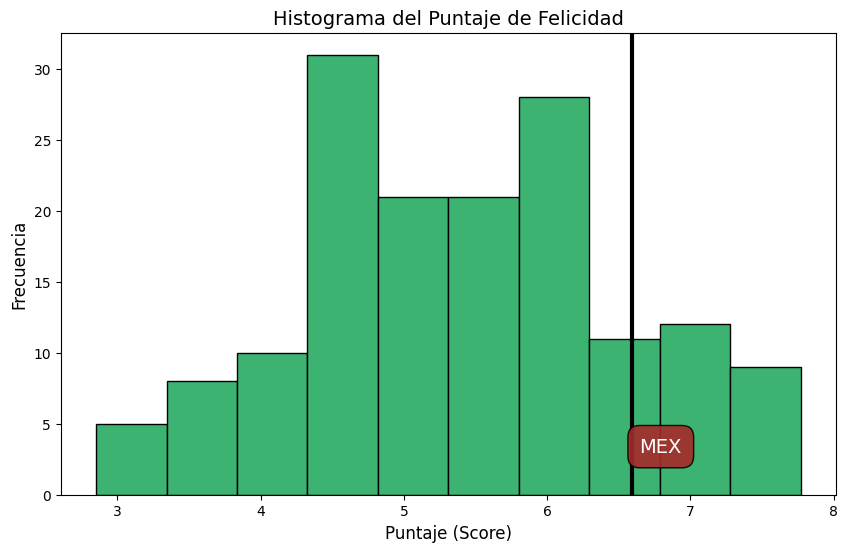

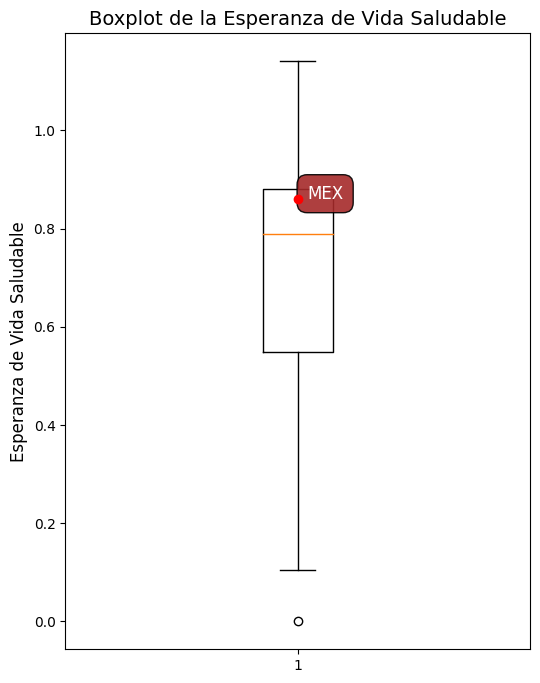

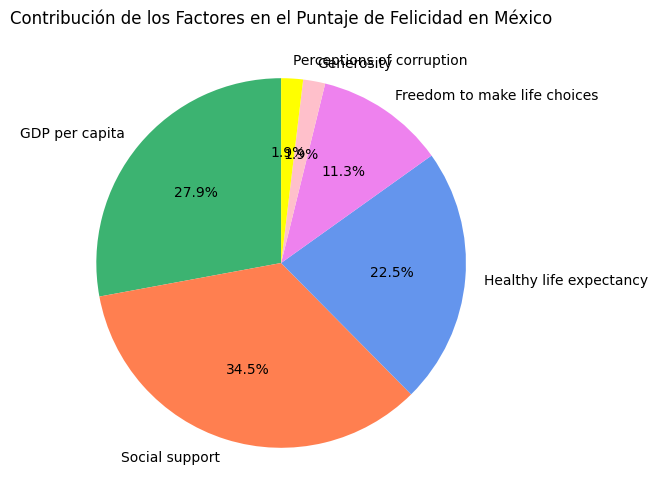

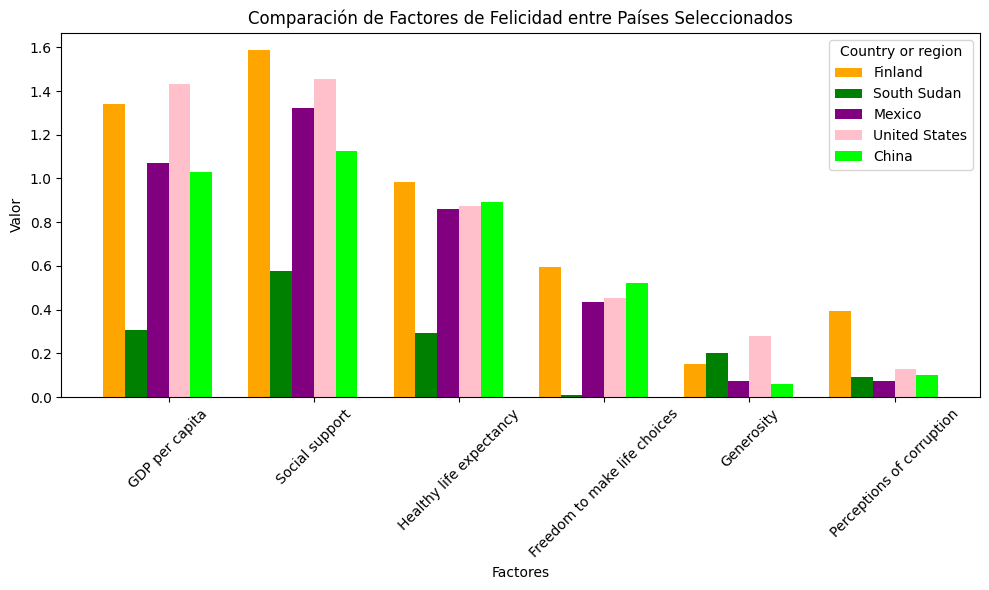

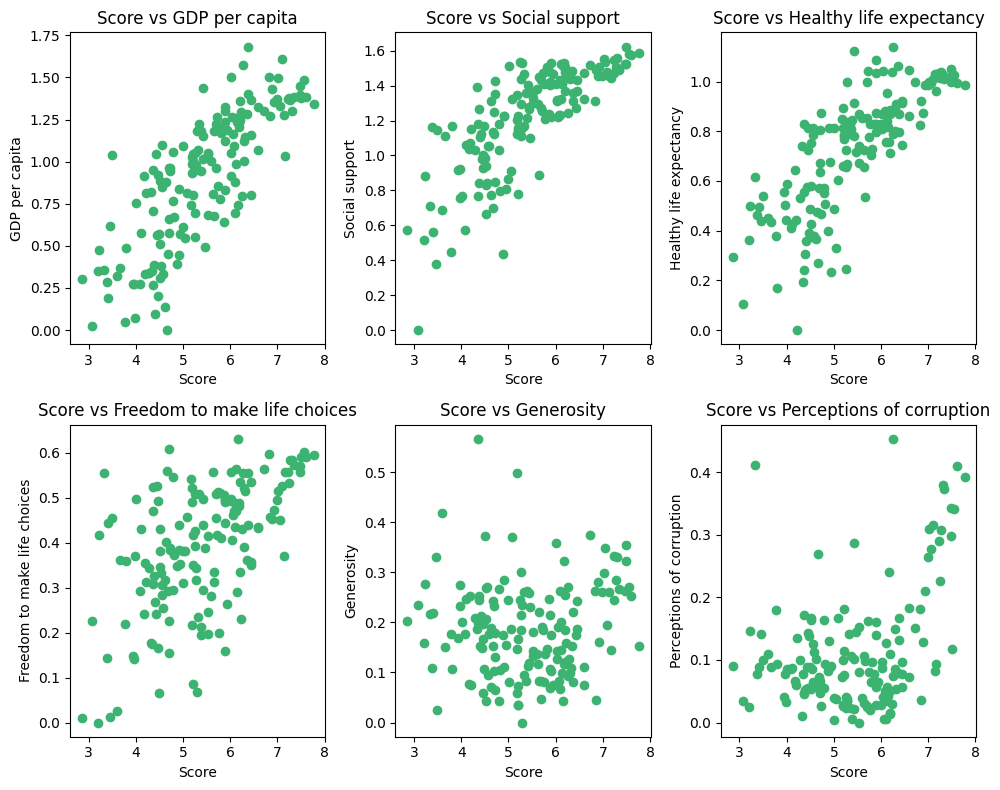

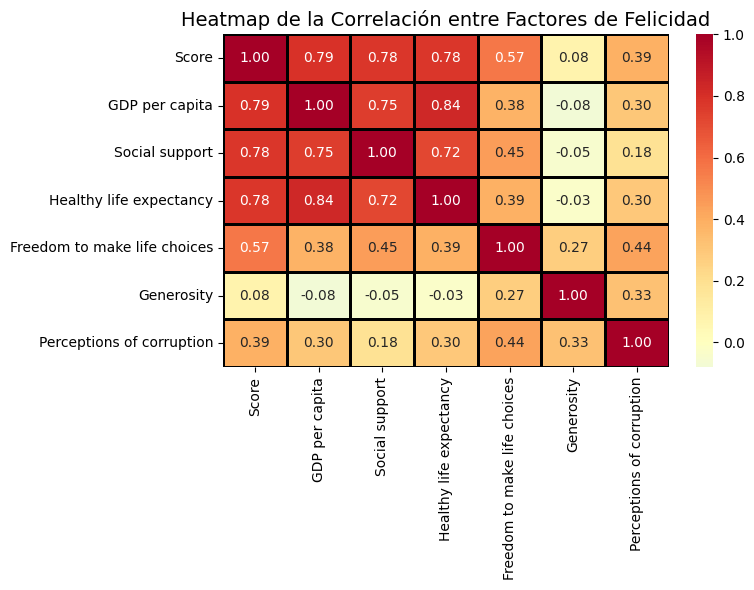

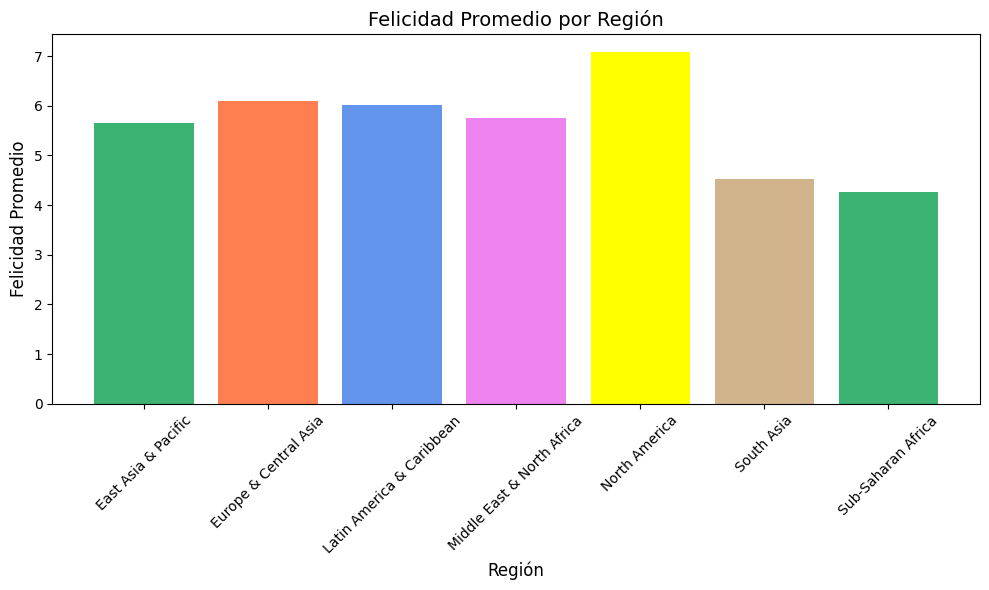

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Paso 2: Cargar el archivo CSV en un DataFrame (happiness)
file_path = '/content/Happiness_report.csv'
happiness = pd.read_csv(file_path)

# Paso 3: Filtrar la información de México y establecer 'Country or region' como índice
mexico = happiness[happiness['Country or region'] == 'Mexico'].set_index('Country or region')

# Paso 4: Crear el histograma del puntaje (Score)
plt.figure(figsize=(10, 6))
plt.hist(happiness['Score'], bins=10, color='mediumseagreen', edgecolor='black')

# Ubicar el valor de México
mexico_score = mexico['Score'].values[0]
plt.axvline(mexico_score, color='black', linestyle='solid', linewidth=3)
plt.text(mexico_score + 0.05, 3, 'MEX', color='white', fontsize=14,
         bbox=dict(facecolor='brown', alpha=0.9, boxstyle='round,pad=0.6'))

# Añadir títulos y etiquetas
plt.title('Histograma del Puntaje de Felicidad', fontsize=14)
plt.xlabel('Puntaje (Score)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.show()
# Paso 5: Crear un boxplot para la columna "Healthy life expectancy" en orientación vertical
plt.figure(figsize=(6, 8))
plt.boxplot(happiness['Healthy life expectancy'], vert=True, patch_artist=False)

# Ubicar el valor de México en el boxplot
mexico_life_expectancy = mexico['Healthy life expectancy'].values[0]
plt.scatter(1, mexico_life_expectancy, color='red', zorder=5)  # Dibuja un punto en el valor de México
plt.text(1.02, mexico_life_expectancy, 'MEX', color='white', fontsize=12,
         bbox=dict(facecolor='brown', alpha=0.9, boxstyle='round,pad=0.6'))

# Añadir título y etiquetas al boxplot
plt.title('Boxplot de la Esperanza de Vida Saludable', fontsize=14)
plt.ylabel('Esperanza de Vida Saludable', fontsize=12)

# Mostrar el gráfico del boxplot
plt.show()
# Paso 6: Crear una gráfica circular para analizar la contribución de los factores en la felicidad en México
# Factores relevantes para México
factors = ['GDP per capita', 'Social support', 'Healthy life expectancy',
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
values = mexico[['GDP per capita', 'Social support', 'Healthy life expectancy',
                 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].values.flatten()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(values, labels=factors, autopct='%1.1f%%', startangle=90, colors=['mediumseagreen', 'coral', 'cornflowerblue', 'violet', 'pink', 'yellow'])

# Añadir título
plt.title('Contribución de los Factores en el Puntaje de Felicidad en México')

# Mostrar el gráfico de pastel
plt.show()
# Paso 7: Filtrar el dataframe para 5 países (el más feliz, el menos feliz, México y dos más) y visualizar los 6 factores
countries_of_interest = ['Finland', 'South Sudan', 'Mexico', 'United States', 'China']
filtered_df = happiness[happiness['Country or region'].isin(countries_of_interest)]

# Definir las posiciones y ancho de barras
n_factors = len(factors)
n_countries = len(countries_of_interest)
bar_width = 0.15
index = np.arange(n_factors)

# Colores para cada país
colors = ['orange', 'green', 'purple', 'pink', 'lime']

# Crear la figura para el gráfico de barras
plt.figure(figsize=(10, 6))

# Dibujar las barras para cada país
for i, country in enumerate(countries_of_interest):
    plt.bar(index + i * bar_width,
            filtered_df[filtered_df['Country or region'] == country][factors].values.flatten(),
            bar_width,
            label=country,
            color=colors[i])

# Añadir etiquetas y leyenda
plt.xlabel('Factores')
plt.ylabel('Valor')
plt.title('Comparación de Factores de Felicidad entre Países Seleccionados')
plt.xticks(index + bar_width * (n_countries / 2), factors, rotation=45)
plt.legend(title='Country or region')

# Mostrar el gráfico de barras
plt.tight_layout()
plt.show()
# Paso 8: Crear una matriz de subgráficas de 2x3 con scatter plots del puntaje (score) versus los 6 factores
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

# Dibujar scatter plots para cada factor
for i, factor in enumerate(factors):
    row = i // 3
    col = i % 3
    axes[row, col].scatter(happiness['Score'], happiness[factor], color='mediumseagreen')
    axes[row, col].set_title(f'Score vs {factor}')
    axes[row, col].set_xlabel('Score')
    axes[row, col].set_ylabel(factor)

# Ajustar el diseño
plt.tight_layout()
plt.show()

# Paso 9: Crear un heatmap de correlación entre los factores de felicidad
correlation_matrix = happiness[['Score', 'GDP per capita', 'Social support',
                                'Healthy life expectancy', 'Freedom to make life choices',
                                'Generosity', 'Perceptions of corruption']].corr()

# Crear el heatmap con un diseño ajustado con el esquema de color rojo similar al ejemplo
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0, linewidths=1, linecolor='black', fmt=".2f")

# Añadir título
plt.title('Heatmap de la Correlación entre Factores de Felicidad', fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()
# Paso 10: Combinar el dataframe de felicidad con los metadatos (Metadata.csv) para graficar la felicidad promedio por región
metadata_path = '/content/Metadata.csv'
metadata_df = pd.read_csv(metadata_path)

# Combinar el dataframe de felicidad con los metadatos usando 'TableName' como clave
combined_df = pd.merge(happiness, metadata_df, left_on='Country or region', right_on='TableName')

# Calcular la felicidad promedio por región
average_happiness_by_region = combined_df.groupby('Region')['Score'].mean().reset_index()

# Crear la gráfica de barras para la felicidad promedio por región
plt.figure(figsize=(10, 6))
plt.bar(average_happiness_by_region['Region'], average_happiness_by_region['Score'], color=['mediumseagreen', 'coral', 'cornflowerblue', 'violet', 'yellow', 'tan'])

# Añadir títulos y etiquetas
plt.title('Felicidad Promedio por Región', fontsize=14)
plt.xlabel('Región', fontsize=12)
plt.ylabel('Felicidad Promedio', fontsize=12)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()